In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/hsb2.csv')

df.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


# 1. Scatter plot

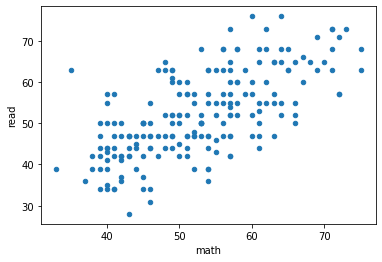

In [3]:
df.plot.scatter(x='math', y='read')
plt.show()

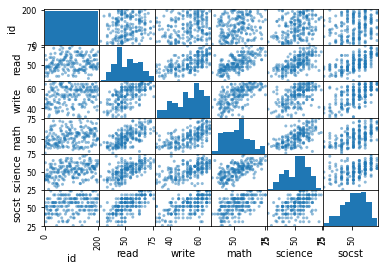

In [4]:
# Cross axis = histogram()
pd.plotting.scatter_matrix(df)
plt.show()

# 2. Correlation - Numeric

In [5]:
# Pearson
df.corr()

,id,read,write,math,science,socst
id,1.000000,0.148620,0.186688,0.219234,0.321402,0.183305
read,0.148620,1.000000,0.596776,0.662280,0.630158,0.621484
write,0.186688,0.596776,1.000000,0.617449,0.570442,0.604793
math,0.219234,0.662280,0.617449,1.000000,0.630733,0.544480
science,0.321402,0.630158,0.570442,0.630733,1.000000,0.465106
socst,0.183305,0.621484,0.604793,0.544480,0.465106,1.000000


In [6]:
# Spearman
df.corr(method='spearman')

,id,read,write,math,science,socst
id,1.000000,0.153640,0.179333,0.223898,0.317097,0.189655
read,0.153640,1.000000,0.616745,0.663126,0.645440,0.633171
write,0.179333,0.616745,1.000000,0.643944,0.581204,0.592279
math,0.223898,0.663126,0.643944,1.000000,0.640282,0.541440
science,0.317097,0.645440,0.581204,0.640282,1.000000,0.480785
socst,0.189655,0.633171,0.592279,0.541440,0.480785,1.000000


In [7]:
# Kendall
df.corr(method='spearman')

,id,read,write,math,science,socst
id,1.000000,0.153640,0.179333,0.223898,0.317097,0.189655
read,0.153640,1.000000,0.616745,0.663126,0.645440,0.633171
write,0.179333,0.616745,1.000000,0.643944,0.581204,0.592279
math,0.223898,0.663126,0.643944,1.000000,0.640282,0.541440
science,0.317097,0.645440,0.581204,0.640282,1.000000,0.480785
socst,0.189655,0.633171,0.592279,0.541440,0.480785,1.000000


# 2. Correlation - Categorical

In [8]:
# Preview
df['ses']

0         low
1      middle
2        high
3        high
4      middle
        ...  
195    middle
196    middle
197    middle
198    middle
199      high
Name: ses, Length: 200, dtype: object

In [9]:
# Change type to ordered categories: high > middle > low
df['ses'] = df['ses'].astype(
    pd.api.types.CategoricalDtype(categories=['low', 'middle', 'high'], ordered=True))

df['ses']

0         low
1      middle
2        high
3        high
4      middle
        ...  
195    middle
196    middle
197    middle
198    middle
199      high
Name: ses, Length: 200, dtype: category
Categories (3, object): ['low' < 'middle' < 'high']

In [10]:
# Label encoding: low=0, middle=1, high=2
df['ses-codes'] = df['ses'].cat.codes
df['ses-codes'].head()

0    0
1    1
2    2
3    2
4    1
Name: ses-codes, dtype: int8

In [11]:
# Spearman for Categorical data
df.corr(method='spearman')

,id,read,write,math,science,socst,ses-codes
id,1.000000,0.153640,0.179333,0.223898,0.317097,0.189655,0.207419
read,0.153640,1.000000,0.616745,0.663126,0.645440,0.633171,0.280435
write,0.179333,0.616745,1.000000,0.643944,0.581204,0.592279,0.222360
math,0.223898,0.663126,0.643944,1.000000,0.640282,0.541440,0.292735
science,0.317097,0.645440,0.581204,0.640282,1.000000,0.480785,0.289827
socst,0.189655,0.633171,0.592279,0.541440,0.480785,1.000000,0.342980
ses-codes,0.207419,0.280435,0.222360,0.292735,0.289827,0.342980,1.000000
